<a href="https://colab.research.google.com/github/RamaHM1/kecerdasanbuatan/blob/main/neural_network/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download dataset172iSK0cneDKq79zZ-UT5zJz0yakfpiI2
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB" -O /tmp/herbal.zip && rm -rf /tmp/cookies.txt

--2021-11-12 11:04:45--  https://docs.google.com/uc?export=download&confirm=WvNK&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB
Resolving docs.google.com (docs.google.com)... 142.250.141.138, 142.250.141.113, 142.250.141.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-1c-docs.googleusercontent.com/docs/securesc/1kop7654cbmheii0oaajkq4nc65ml2ol/eegmoea8t9imntachladjac6fn3rfc00/1636715025000/15542249348961723767/05861867152584881026Z/17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB?e=download [following]
--2021-11-12 11:04:45--  https://doc-10-1c-docs.googleusercontent.com/docs/securesc/1kop7654cbmheii0oaajkq4nc65ml2ol/eegmoea8t9imntachladjac6fn3rfc00/1636715025000/15542249348961723767/05861867152584881026Z/17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB?e=download
Resolving doc-10-1c-docs.googleusercontent.com (doc-10-1c-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Conne

In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/herbal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/herbal'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (70, 150, 150, 3)
Train Label =  (70,)
Validation Data =  (30, 150, 150, 3)
Validation Label =  (30,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [165 181 194]
Data setelah di-normalisasi  [0.64705884 0.70980394 0.7607843 ]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[30:40])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[30:40])

Label sebelum di-encoder  ['daun_jambu' 'daun_jambu' 'daun_jambu' 'daun_jambu' 'daun_jambu'
 'daun_jeruk_nipis' 'daun_jeruk_nipis' 'daun_jeruk_nipis'
 'daun_jeruk_nipis' 'daun_jeruk_nipis']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 19, 19, 64)      

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
4/4 [==============================] - 2s 439ms/step - loss: 0.8843 - acc: 0.4571 - val_loss: 0.7193 - val_acc: 0.5000
Epoch 2/15
4/4 [==============================] - 2s 381ms/step - loss: 0.6578 - acc: 0.5286 - val_loss: 0.6013 - val_acc: 0.8333
Epoch 3/15
4/4 [==============================] - 2s 389ms/step - loss: 0.5483 - acc: 0.8857 - val_loss: 0.5107 - val_acc: 0.7333
Epoch 4/15
4/4 [==============================] - 2s 381ms/step - loss: 0.3928 - acc: 0.9143 - val_loss: 0.4383 - val_acc: 0.8333
Epoch 5/15
4/4 [==============================] - 2s 390ms/step - loss: 0.2880 - acc: 0.9143 - val_loss: 0.3705 - val_acc: 0.8333
Epoch 6/15
4/4 [==============================] - 2s 388ms/step - loss: 0.2000 - acc: 0.9429 - val_loss: 0.4408 - val_acc: 0.8000
Epoch 7/15
4/4 [==============================] - 2s 387ms/step - loss: 0.1414 - acc: 0.9571 - val_loss: 0.5638 - val_acc: 0.8667
Epoch 8/15
4/4 [==============================] - 2s 385ms/step - loss: 0.2038 - acc: 0.91

<h3>Evaluasi Model</h3>

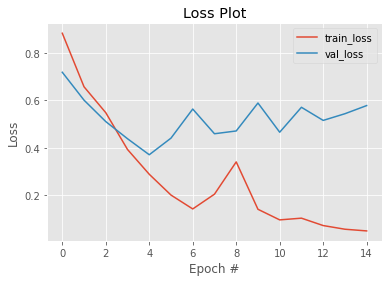

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

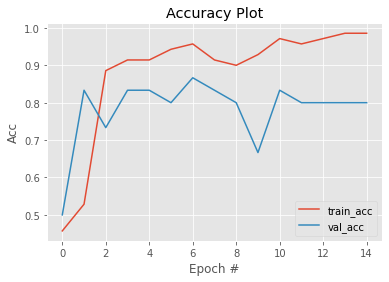

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.80      0.80      0.80        15

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

